In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
# standardisation
from sklearn.preprocessing import StandardScaler
# minmax
from sklearn.preprocessing import MinMaxScaler
# maximum absolute scaling
from sklearn.preprocessing import MaxAbsScaler
# robust scaling
from sklearn.preprocessing import RobustScaler
# unit length
from sklearn.preprocessing import Normalizer

In [3]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [7]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,3.866667,28.618702,5.423404,1.094775,1425.157323,3.040518,35.630093,-119.566647
std,1.891158,12.596694,2.287619,0.452752,1149.580157,6.868167,2.140121,2.006587
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000
25%,2.570600,18.000000,4.452249,1.005872,784.000000,2.427269,33.930000,-121.800000
50%,3.539100,29.000000,5.229318,1.048780,1165.000000,2.816355,34.260000,-118.490000
75%,4.736100,37.000000,6.047619,1.100000,1724.000000,3.280445,37.710000,-118.000000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,599.714286,41.950000,-114.310000


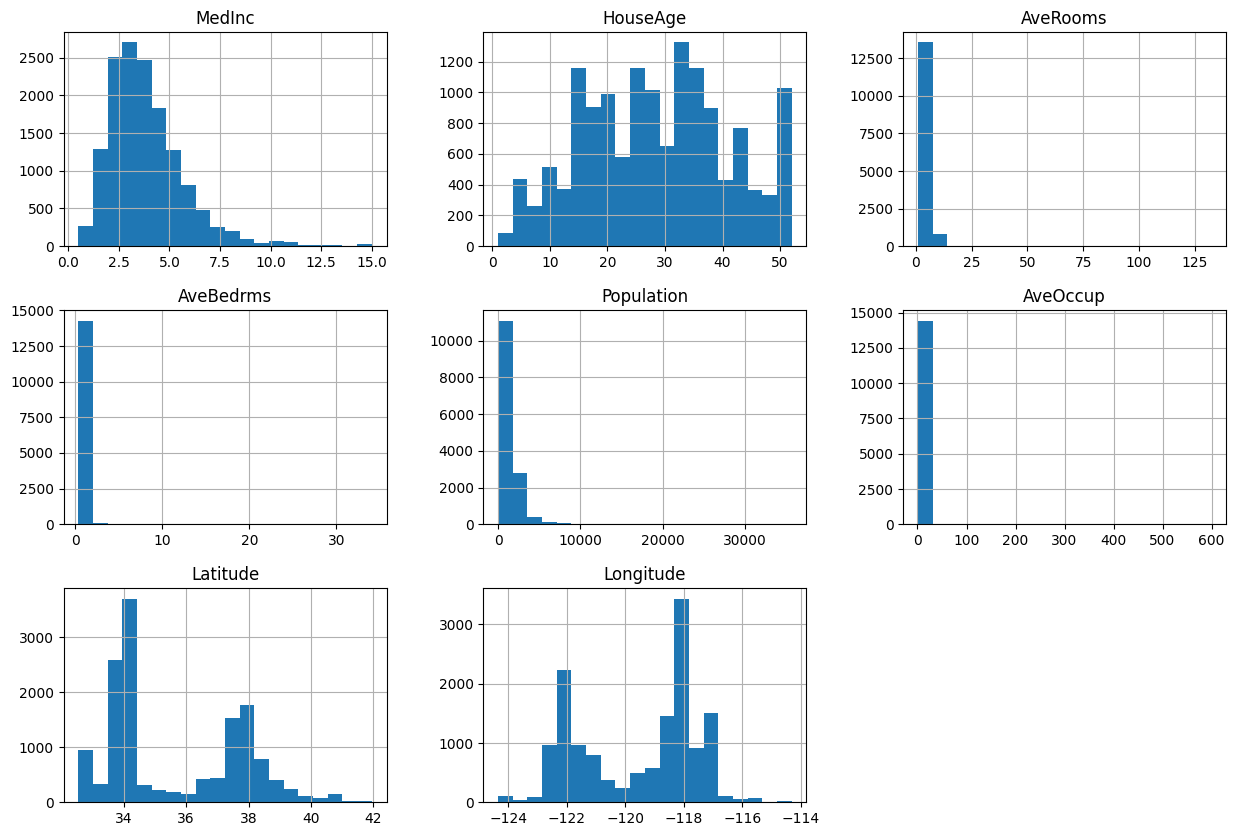

In [10]:
X_train.hist(bins=20,figsize=(15,10))
plt.show()

## Standardization

In [6]:
scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04
mean,8.999815e-17,-1.077027e-16,-4.873670e-16,2.564701e-16,-6.393311e-17,5.606442e-17,1.132354e-15,7.215589e-15
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.780329e+00,-2.192612e+00,-2.000948e+00,-1.681865e+00,-1.237153e+00,-3.335092e-01,-1.443938e+00,-2.383908e+00
25%,-6.853538e-01,-8.430044e-01,-4.245411e-01,-1.963688e-01,-5.577510e-01,-8.929172e-02,-7.944189e-01,-1.113050e+00
50%,-1.732160e-01,3.027077e-02,-8.484487e-02,-1.015919e-01,-2.263142e-01,-3.263905e-02,-6.402167e-01,5.365748e-01
75%,4.597515e-01,6.653800e-01,2.728762e-01,1.154128e-02,2.599671e-01,3.493450e-02,9.718978e-01,7.807790e-01
max,5.887302e+00,1.856210e+00,5.556621e+01,7.282803e+01,2.980047e+01,8.687827e+01,2.953163e+00,2.619786e+00


In [9]:
X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,-1.000304,1.856210,-1.146823,-0.871975,-1.071870,0.259828,0.513964,-0.111314
256,-0.849386,1.141712,-0.765855,0.197335,-0.512516,-0.003271,0.999935,-1.317384
7887,1.286205,-0.922393,0.461027,-0.015158,-0.033194,0.112104,-0.822456,0.760844
4581,-1.135200,-0.922393,-1.270100,0.223585,1.414342,0.001526,-0.733673,0.641234
1993,-0.870432,1.697432,-0.350004,0.147772,-0.712596,0.085648,0.513964,-0.121281


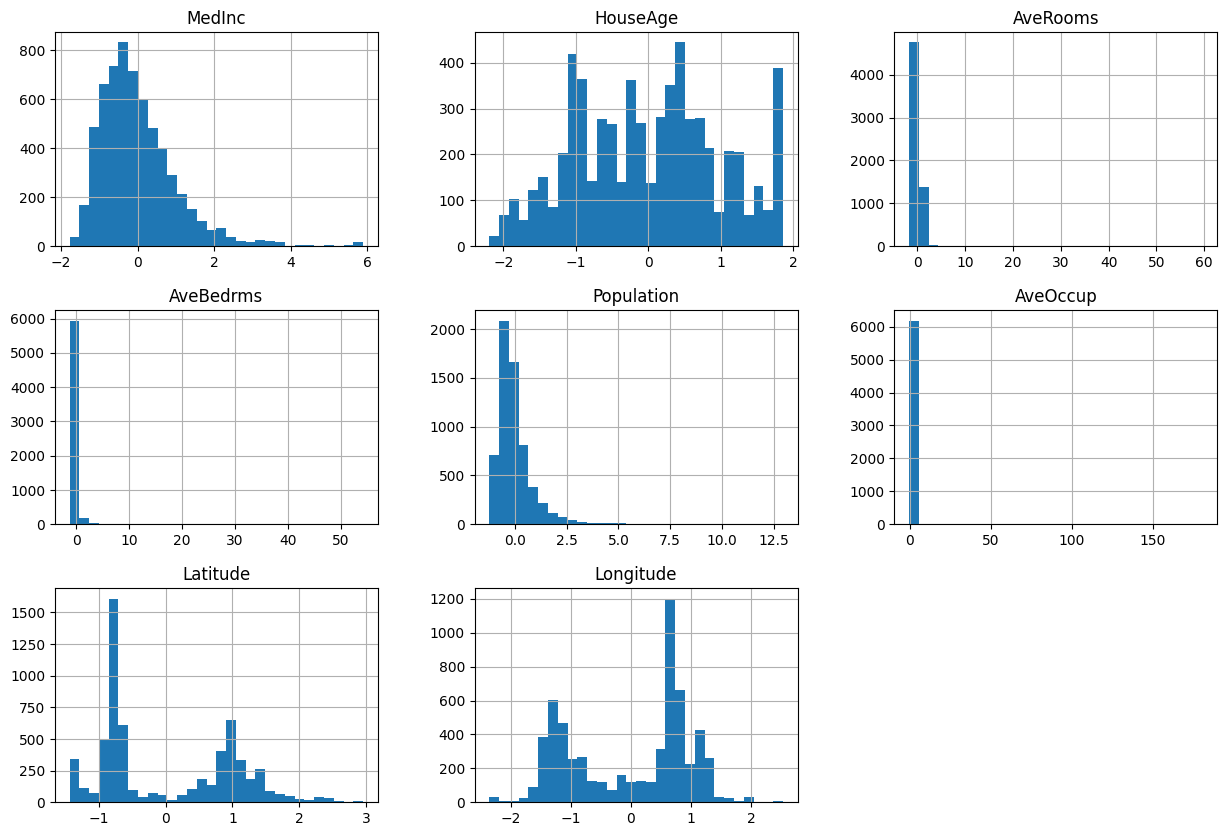

In [12]:
X_test_scaled.hist(bins=30,figsize=(15,10))
plt.show()

## Min Max Scaler

In [14]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_test_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,0.233108,0.542902,0.034900,0.022760,0.039890,0.003992,0.329010,0.475414
std,0.132412,0.246283,0.021739,0.015414,0.030594,0.026373,0.225968,0.198857
min,0.000000,0.000000,0.004705,0.004941,0.000140,-0.000096,0.002125,0.004980
25%,0.141533,0.333333,0.027097,0.019955,0.022226,0.002816,0.147715,0.254980
50%,0.208942,0.549020,0.033270,0.021208,0.032694,0.003464,0.182784,0.582669
75%,0.294399,0.705882,0.039625,0.022681,0.048327,0.004233,0.550478,0.630478
max,1.000000,1.000000,1.071197,0.750090,0.456907,2.074553,1.000000,0.982072


## Mean Normalisation

In [17]:
means = X_train.mean(axis=0)
means

,0
MedInc,3.866667
HouseAge,28.618702
AveRooms,5.423404
AveBedrms,1.094775
Population,1425.157323
AveOccup,3.040518
Latitude,35.630093
Longitude,-119.566647


In [18]:
ranges = X_train.max(axis=0) - X_train.min(axis=0)
ranges

,0
MedInc,14.500200
HouseAge,51.000000
AveRooms,131.687179
AveBedrms,33.733333
Population,35679.000000
AveOccup,598.964286
Latitude,9.410000
Longitude,10.040000


In [19]:
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [20]:
X_test_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,0.000920,0.001358,0.000142,0.000188,0.000030,0.000168,0.000626,-0.001015
std,0.132412,0.246283,0.021739,0.015414,0.030594,0.026373,0.225968,0.198857
min,-0.232188,-0.541543,-0.030053,-0.017632,-0.039720,-0.003920,-0.326259,-0.471450
25%,-0.090655,-0.208210,-0.007662,-0.002617,-0.017634,-0.001009,-0.180669,-0.221450
50%,-0.023246,0.007476,-0.001489,-0.001365,-0.007165,-0.000360,-0.145600,0.106240
75%,0.062212,0.164339,0.004866,0.000108,0.008467,0.000409,0.222094,0.154048
max,0.767812,0.458457,1.036439,0.727517,0.417048,2.070729,0.671616,0.505642


## Max absolute scaling

In [22]:
scaler = MaxAbsScaler().set_output(transform="pandas")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.257776,0.550360,0.040921,0.032136,0.039941,0.005070,0.849347,-0.961533
std,0.126076,0.242244,0.017261,0.013290,0.032217,0.011452,0.051016,0.016137
min,0.033326,0.019231,0.006384,0.009785,0.000084,0.001251,0.775685,-1.000000
25%,0.171372,0.346154,0.033593,0.029527,0.021972,0.004047,0.808820,-0.979493
50%,0.235938,0.557692,0.039457,0.030786,0.032650,0.004696,0.816687,-0.952875
75%,0.315738,0.711538,0.045631,0.032290,0.048316,0.005470,0.898927,-0.948934
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.919260


In [26]:
# centering always recommended
scaler_mean = StandardScaler(with_mean=True,with_std=False).set_output(transform="pandas")
scaler_maxabs = MaxAbsScaler().set_output(transform="pandas")
scaler_mean.fit(X_train)
scaler_maxabs.fit(X_train)
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

In [27]:
X_test_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,0.000890,0.001332,0.000141,0.000186,0.000030,0.000168,0.000140,-0.000082
std,0.128000,0.241546,0.021600,0.015263,0.030592,0.026340,0.050688,0.016056
min,-0.224450,-0.531129,-0.029862,-0.017459,-0.039716,-0.003916,-0.073185,-0.038065
25%,-0.087634,-0.204206,-0.007613,-0.002591,-0.017632,-0.001007,-0.040527,-0.017880
50%,-0.022471,0.007333,-0.001479,-0.001351,-0.007165,-0.000359,-0.032660,0.008578
75%,0.060138,0.161179,0.004835,0.000107,0.008466,0.000408,0.049819,0.012438
max,0.742224,0.449640,1.029822,0.720399,0.417013,2.068140,0.150653,0.040825


## Robust Scaling

In [28]:
scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,1.444800e+04,14448.000000,14448.000000
mean,0.151266,-0.020068,0.121656,0.488634,0.276763,2.627388e-01,0.362459,-0.283328
std,0.873312,0.662984,1.433911,4.809938,1.222958,8.050109e+00,0.566169,0.528049
min,-1.403463,-1.473684,-2.747427,-7.600755,-1.236170,-2.421954e+00,-0.455026,-1.542105
25%,-0.447241,-0.578947,-0.487077,-0.455855,-0.405319,-4.560444e-01,-0.087302,-0.871053
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-2.602627e-16,0.000000,0.000000
75%,0.552759,0.421053,0.512923,0.544145,0.594681,5.439556e-01,0.912698,0.128947
max,5.292542,1.210526,79.795908,350.774823,36.720213,6.996181e+02,2.034392,1.100000


## Unit Length

In [31]:
scaler = Normalizer(norm='l1').set_output(transform="pandas")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.003307,0.025618,0.004845,0.000980,0.829530,0.002471,0.030689,-0.102560
std,0.003101,0.021863,0.006238,0.001385,0.115177,0.002263,0.020812,0.068250
min,0.000072,0.000209,0.000147,0.000028,0.016782,0.000163,0.000930,-0.691357
25%,0.001554,0.011168,0.002548,0.000549,0.795538,0.001473,0.018314,-0.121284
50%,0.002535,0.020402,0.003785,0.000772,0.854378,0.002075,0.026044,-0.087644
75%,0.004005,0.033935,0.005554,0.001074,0.899395,0.002862,0.036334,-0.062273
max,0.065525,0.236108,0.329271,0.084637,0.994950,0.119789,0.206662,-0.003274


In [33]:
scaler = Normalizer(norm='l2').set_output(transform="pandas")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.004258,0.033325,0.006370,0.001292,0.978428,0.003174,0.039616,-0.132217
std,0.005068,0.036131,0.011609,0.002634,0.074459,0.003599,0.036169,0.118785
min,0.000072,0.000212,0.000148,0.000028,0.024116,0.000164,0.000935,-0.957531
25%,0.001745,0.012462,0.002841,0.000610,0.986614,0.001650,0.020339,-0.150302
50%,0.002983,0.023740,0.004415,0.000900,0.993908,0.002423,0.030343,-0.101977
75%,0.004940,0.041784,0.006860,0.001330,0.997267,0.003535,0.045020,-0.069048
max,0.113007,0.392072,0.687806,0.176795,0.999994,0.141353,0.295699,-0.003291
